<a href="https://colab.research.google.com/github/lgbenavid/Challenge-Alura-Store/blob/main/AluraStoreLatam_GBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Configuraci칩n inicial en Google Colab

In [121]:
# Importar librer칤as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Configurar el estilo de los gr치ficos
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("pastel")

### Importaci칩n de datos



In [143]:

# URLs de los datos
urls = {
    'Tienda 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'Tienda 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'Tienda 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    'Tienda 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Funci칩n para cargar y preparar datos
def cargar_datos():
    tiendas = {}
    for nombre, url in urls.items():
        df = pd.read_csv(url)

        # Limpieza b치sica de datos
        df = df.dropna()
        df['Precio'] = df['Precio'].astype(float)
        df['Costo de env칤o'] = df['Costo de env칤o'].astype(float)

        tiendas[nombre] = df

    return tiendas

# Cargar todos los datos
tiendas_data = cargar_datos()

# Mostrar estructura de datos de ejemplo
print("\nEstructura de datos de una tienda:")
display(tiendas_data['Tienda 1'].head(3))
print(f"\nTotal de registros por tienda:")
for nombre, df in tiendas_data.items():
    print(f"{nombre}: {len(df):,} registros")



Estructura de datos de una tienda:


Producto Categor칤a del Producto    Precio  Costo de env칤o  \
0  Asistente virtual           Electr칩nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci칩n  \
0      16/01/2021      Pedro Gomez          Bogot치             4   
1      18/05/2022  Beatriz Morales        Medell칤n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   

       M칠todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr칠dito                   8   4.60971 -74.08175  
1  Tarjeta de cr칠dito                   4   6.25184 -75.56359  
2  Tarjeta de cr칠dito                   1  10.39972 -75.51444


Total de registros por tienda:
Tienda 1: 2,359 registros
Tienda 2: 2,359 registros
Tienda 3: 2,359 registros
Tienda 4: 2,358 registros


#1. An치lisis de facturaci칩n



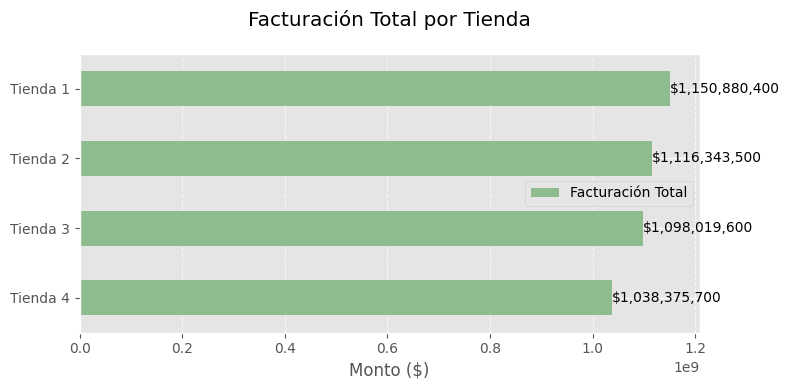

In [137]:
# An치lisis de facturaci칩n por tienda
def analizar_facturacion(tiendas):
  facturacion = {}
  for nombre, df in tiendas.items():
    total = df['Precio'].sum()
    facturacion[nombre] = total

  facturacion_df = pd.DataFrame.from_dict(facturacion, orient='index', columns=['Facturaci칩n Total'])

  # Gr치fico

  colores = ["#619cff", "#00ba38", "#f8766d", "#00ba38"]

  fig, ax = plt.subplots(figsize=(8, 4))

  facturacion_df.sort_values('Facturaci칩n Total').plot(kind='barh', color='darkseagreen', ax=ax)


  plt.title('Facturaci칩n Total por Tienda', pad=20)
  plt.xlabel('Monto ($)')

  # Agregar etiquetas
  for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1000, p.get_y() + p.get_height()/2, f'${width:,.0f}', ha='left', va='center')
  plt.grid(axis='x', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

  return facturacion_df

facturacion_resultados = analizar_facturacion(tiendas_data)
# display(facturacion_resultados)

# Aplicar formato de separaci칩n de miles y 0 decimales
display(
    facturacion_resultados.style.format({
        'Facturaci칩n Total': '${:,.0f}'.format})
    )

# 2. Ventas por categor칤a

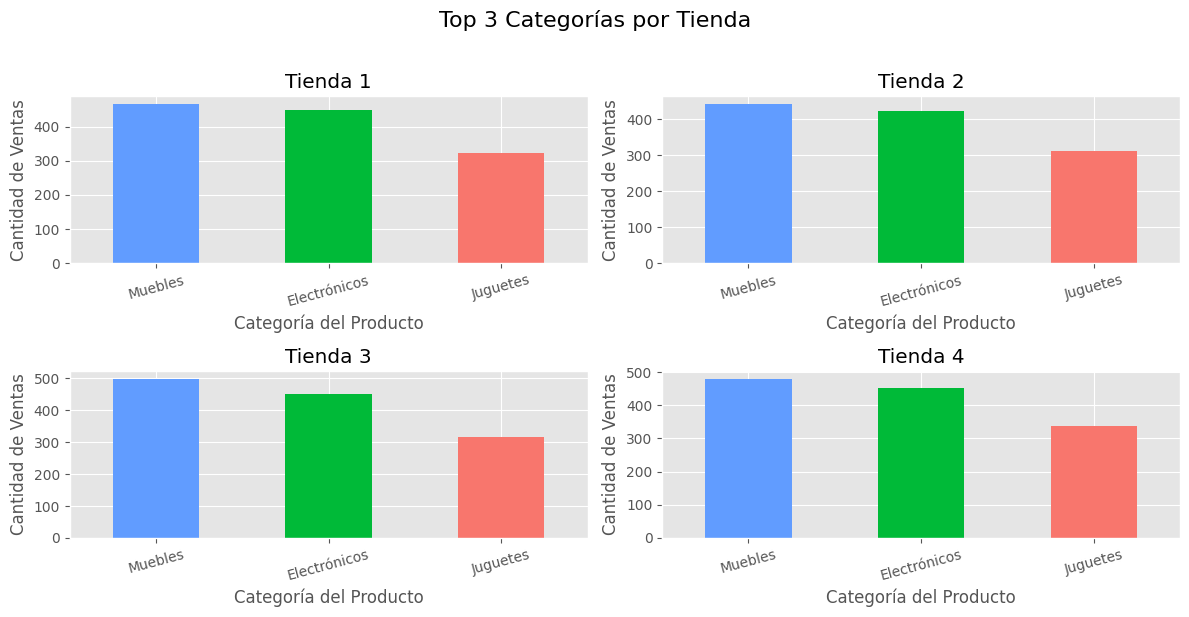


Categor칤as m치s populares por tienda:

Tienda 1:


Ventas
Categor칤a del Producto        
Muebles                    465
Electr칩nicos               448
Juguetes                   324


Tienda 2:


Ventas
Categor칤a del Producto        
Muebles                    442
Electr칩nicos               422
Juguetes                   313


Tienda 3:


Ventas
Categor칤a del Producto        
Muebles                    499
Electr칩nicos               451
Juguetes                   315


Tienda 4:


Ventas
Categor칤a del Producto        
Muebles                    480
Electr칩nicos               451
Juguetes                   338

In [150]:
# An치lisis de categor칤as
def analizar_categorias(tiendas):
    categorias_por_tienda = {}

    for nombre, df in tiendas.items():
        top_categorias = df['Categor칤a del Producto'].value_counts().head(3)
        categorias_por_tienda[nombre] = top_categorias

# Gr치fico
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))
    fig.suptitle('Top 3 Categor칤as por Tienda', y=1.02, fontsize=16)

    for (nombre, categorias), ax in zip(categorias_por_tienda.items(), axes.flatten()):
        categorias.plot(kind='bar', ax=ax, color=["#619cff", "#00ba38", "#f8766d"])
        ax.set_title(nombre)
        ax.set_ylabel('Cantidad de Ventas')
        ax.tick_params(axis='x', rotation=15)

    plt.tight_layout()
    plt.show()

    return categorias_por_tienda

categorias_resultados = analizar_categorias(tiendas_data)
print("\nCategor칤as m치s populares por tienda:")
for tienda, categorias in categorias_resultados.items():
    print(f"\n{tienda}:")
    display(categorias.to_frame('Ventas'))

# 3. Calificaci칩n promedio de la tienda


<Figure size 1000x500 with 0 Axes>

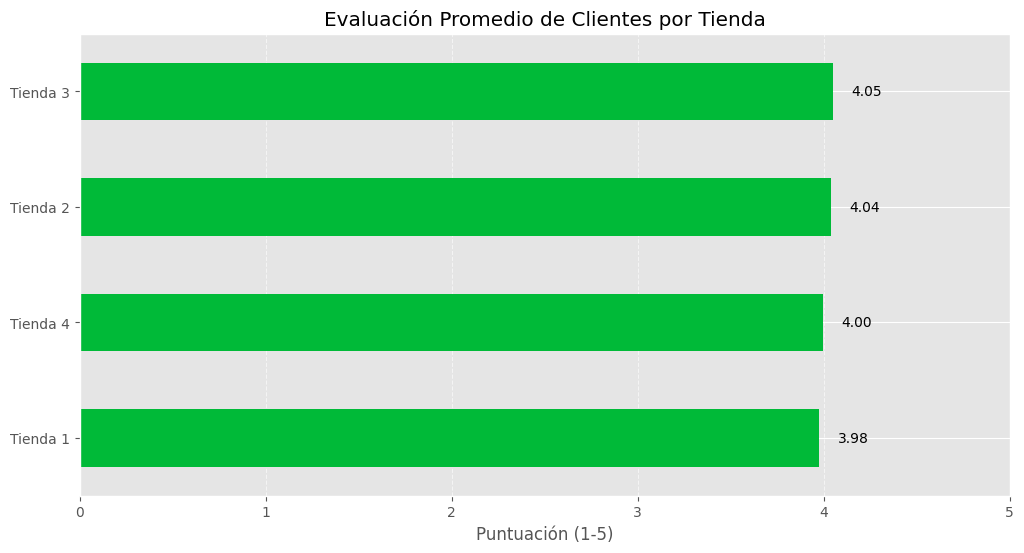


游댳 Tienda 1:
- Promedio: 3.98
- Desviaci칩n est치ndar: 1.42 (variabilidad)
- Moda: 5 (calificaci칩n m치s frecuente)



游댳 Tienda 2:
- Promedio: 4.04
- Desviaci칩n est치ndar: 1.36 (variabilidad)
- Moda: 5 (calificaci칩n m치s frecuente)



游댳 Tienda 3:
- Promedio: 4.05
- Desviaci칩n est치ndar: 1.39 (variabilidad)
- Moda: 5 (calificaci칩n m치s frecuente)


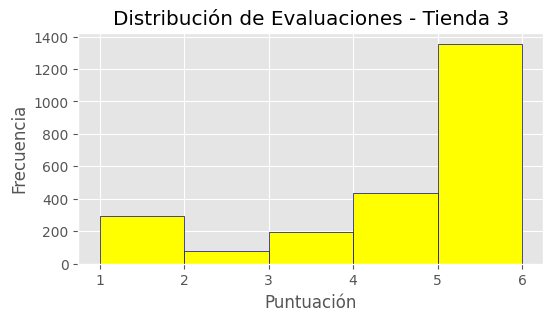


游댳 Tienda 4:
- Promedio: 4.00
- Desviaci칩n est치ndar: 1.40 (variabilidad)
- Moda: 5 (calificaci칩n m치s frecuente)


In [159]:
# Cargar los datos y calcular el promedio de evaluaci칩n
for nombre_tienda, url in urls.items():
    df = pd.read_csv(url)
    promedio_evaluacion = df['Calificaci칩n'].mean()

# Diccionario para almacenar los promedios
promedios = {}

for nombre_tienda, url in urls.items():
    df = pd.read_csv(url)
    promedios[nombre_tienda] = df['Calificaci칩n'].mean()

# Convertir a DataFrame y ordenar
df_promedios = pd.DataFrame.from_dict(promedios, orient='index', columns=['Evaluaci칩n Promedio'])
df_promedios = df_promedios.sort_values('Evaluaci칩n Promedio')

# Gr치fico
plt.figure(figsize=(10, 5))
df_promedios.plot(kind='barh', color='#00ba38', legend=False)
plt.title('Evaluaci칩n Promedio de Clientes por Tienda')
plt.xlabel('Puntuaci칩n (1-5)')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# A침adir etiquetas
for i, v in enumerate(df_promedios['Evaluaci칩n Promedio']):
    plt.text(v + 0.1, i, f"{v:.2f}", color='black', va='center')

plt.show()

'''
Para profundizar en el an치lisis, calculamos:

    Desviaci칩n est치ndar: Para ver qu칠 tan dispersas est치n las calificaciones.

    Moda: La calificaci칩n m치s frecuente.

    Distribuci칩n: Histograma de las evaluaciones.
    '''

for nombre_tienda, url in urls.items():
    df = pd.read_csv(url)
    evaluaciones = df['Calificaci칩n']

    print(f"\n游댳 {nombre_tienda}:")
    print(f"- Promedio: {evaluaciones.mean():.2f}")
    print(f"- Desviaci칩n est치ndar: {evaluaciones.std():.2f} (variabilidad)")
    print(f"- Moda: {evaluaciones.mode().values[0]} (calificaci칩n m치s frecuente)")

    # Histograma
    plt.figure(figsize=(6, 3))
    evaluaciones.plot(kind='hist', bins=5, range=(1, 6), color='yellow', edgecolor='darkblue')
    plt.title(f'Distribuci칩n de Evaluaciones - {nombre_tienda}')
    plt.xlabel('Puntuaci칩n')
    plt.ylabel('Frecuencia')
    plt.show()

# 4. Productos m치s y menos vendidos


Productos m치s y menos vendidos por tienda:

Tienda 1:
  - Producto m치s vendido: 'Microondas' (60 ventas)
  - Producto menos vendido: 'Auriculares con micr칩fono' (33 ventas)
  - Total productos distintos: 51

Tienda 2:
  - Producto m치s vendido: 'Iniciando en programaci칩n' (65 ventas)
  - Producto menos vendido: 'Juego de mesa' (32 ventas)
  - Total productos distintos: 51

Tienda 3:
  - Producto m치s vendido: 'Kit de bancas' (57 ventas)
  - Producto menos vendido: 'Bloques de construcci칩n' (35 ventas)
  - Total productos distintos: 51

Tienda 4:
  - Producto m치s vendido: 'Cama box' (62 ventas)
  - Producto menos vendido: 'Guitarra el칠ctrica' (33 ventas)
  - Total productos distintos: 51


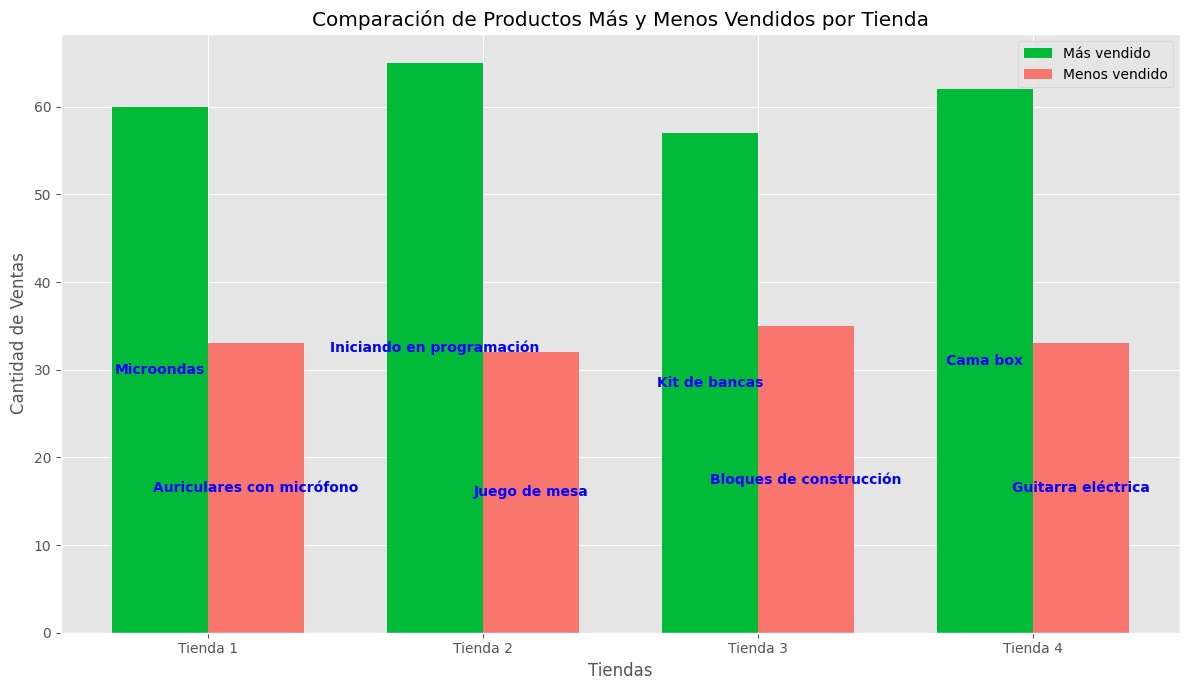

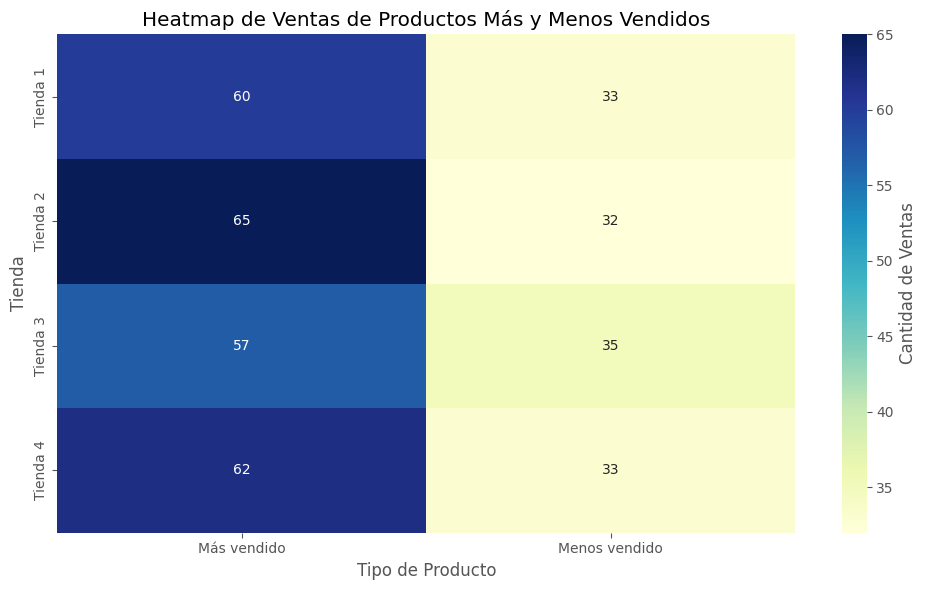

In [163]:
# An치lisis de productos m치s y menos vendidos por tienda
def analizar_productos(tiendas):
    productos_por_tienda = {}

    for nombre, df in tiendas.items():
        productos = df['Producto'].value_counts()
        top_producto = productos.idxmax()
        top_cantidad = productos.max()
        peor_producto = productos.idxmin()
        peor_cantidad = productos.min()

        productos_por_tienda[nombre] = {
            'Producto m치s vendido': (top_producto, top_cantidad),
            'Producto menos vendido': (peor_producto, peor_cantidad),
            'Total productos distintos': len(productos)
        }

    # Presentaci칩n de resultados
    print("\nProductos m치s y menos vendidos por tienda:")
    for tienda, datos in productos_por_tienda.items():
        print(f"\n{tienda}:")
        print(f"  - Producto m치s vendido: '{datos['Producto m치s vendido'][0]}' ({datos['Producto m치s vendido'][1]} ventas)")
        print(f"  - Producto menos vendido: '{datos['Producto menos vendido'][0]}' ({datos['Producto menos vendido'][1]} ventas)")
        print(f"  - Total productos distintos: {datos['Total productos distintos']}")

    return productos_por_tienda

productos_resultados = analizar_productos(tiendas_data)

# Gr치fico de Barras Comparativas

def graficar_productos_comparativos(productos_resultados):
    # Preparar datos para el gr치fico
    tiendas = list(productos_resultados.keys())
    mas_vendidos = [d['Producto m치s vendido'][1] for d in productos_resultados.values()]
    menos_vendidos = [d['Producto menos vendido'][1] for d in productos_resultados.values()]
    nombres_mas_vendidos = [d['Producto m치s vendido'][0] for d in productos_resultados.values()]

    # Configurar el gr치fico
    fig, ax = plt.subplots(figsize=(12, 7))
    bar_width = 0.35
    index = np.arange(len(tiendas))

    # Barras para productos m치s vendidos
    bars1 = ax.bar(index, mas_vendidos, bar_width, label='M치s vendido', color='#00ba38')

    # Barras para productos menos vendidos
    bars2 = ax.bar(index + bar_width, menos_vendidos, bar_width, label='Menos vendido', color='#f8766d')

    # Personalizar el gr치fico
    ax.set_xlabel('Tiendas')
    ax.set_ylabel('Cantidad de Ventas')
    ax.set_title('Comparaci칩n de Productos M치s y Menos Vendidos por Tienda')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(tiendas)
    ax.legend()

    # A침adir etiquetas con los nombres de los productos
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        height1 = bar1.get_height()
        height2 = bar2.get_height()
        ax.text(bar1.get_x() + bar1.get_width()/2., height1/2,
                nombres_mas_vendidos[i], ha='center', va='center', color='blue', fontweight='bold')
        ax.text(bar2.get_x() + bar2.get_width()/2., height2/2,
                productos_resultados[tiendas[i]]['Producto menos vendido'][0],
                ha='center', va='center', color='blue', fontweight='bold')

    plt.tight_layout()
    plt.show()

graficar_productos_comparativos(productos_resultados)

# Heatmap de Popularidad de Productos

def graficar_heatmap(productos_resultados):
    # Preparar datos para el heatmap
    tiendas = list(productos_resultados.keys())
    datos_heatmap = []

    for tienda in tiendas:
        datos = productos_resultados[tienda]
        datos_heatmap.append([
            datos['Producto m치s vendido'][1],  # Ventas del m치s vendido
            datos['Producto menos vendido'][1]  # Ventas del menos vendido
        ])

    df_heatmap = pd.DataFrame(datos_heatmap,
                             index=tiendas,
                             columns=['M치s vendido', 'Menos vendido'])

    # Crear heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_heatmap, annot=True, fmt='d', cmap='YlGnBu',
                cbar_kws={'label': 'Cantidad de Ventas'})

    plt.title('Heatmap de Ventas de Productos M치s y Menos Vendidos')
    plt.xlabel('Tipo de Producto')
    plt.ylabel('Tienda')
    plt.tight_layout()
    plt.show()

graficar_heatmap(productos_resultados)

# 5. Env칤o promedio por tienda

In [168]:
# An치lisis de costos de env칤o
def analizar_envios(tiendas):
    envios = {}
    for nombre, df in tiendas.items():
        promedio = df['Costo de env칤o'].mean()
        envios[nombre] = promedio

    envios_df = pd.DataFrame.from_dict(envios, orient='index', columns=['Costo Promedio Env칤o'])

    # Gr치fico
    plt.figure(figsize=(8, 4))
    ax = envios_df.sort_values('Costo Promedio Env칤o', ascending=False).plot(kind='barh', color='darkseagreen')
    plt.title('Costo Promedio de Env칤o por Tienda', pad=20)
    plt.xlabel('Costo ($)')

    # Agregar etiquetas
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.2, p.get_y() + p.get_height()/2,
                f'${width:,.2f}',
                ha='left', va='center')

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return envios_df

envios_resultados = analizar_envios(tiendas_data)
display(
    envios_resultados.style.format({
        'Costo Promedio Env칤o': '${:,.2f}'})
    )

<Figure size 800x400 with 0 Axes>

# 6. Informe Final


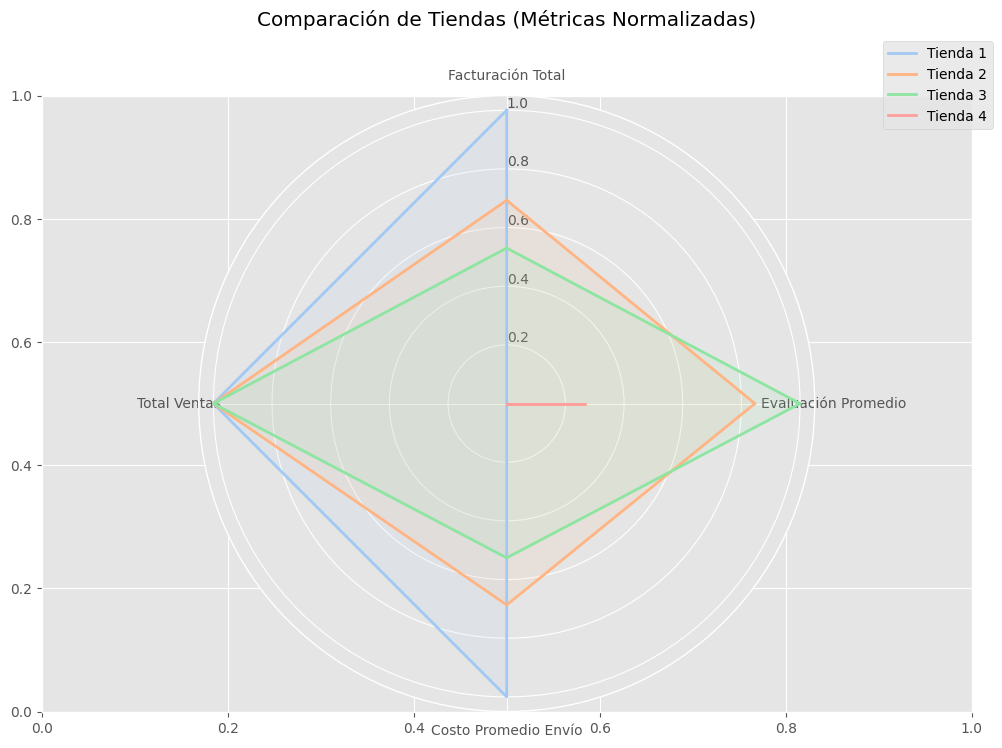


RECOMENDACI칍N FINAL

La tienda con peor desempe침o es: Tienda 4

Razones principales:
- Facturaci칩n total m치s baja: $1,038,375,700
- Evaluaci칩n de clientes m치s baja: 4.00/5
- Costo de env칤o m치s alto: $23,459.46
- Menos ventas totales: 2358 transacciones

RANKING COMPLETO DE TIENDAS (1 = MEJOR, 4 = PEOR)


Facturaci칩n Total  Evaluaci칩n Promedio  Costo Promedio Env칤o  \
Tienda 4                4.0                  3.0                   1.0   
Tienda 1                1.0                  4.0                   4.0   
Tienda 2                2.0                  2.0                   3.0   
Tienda 3                3.0                  1.0                   2.0   

          Total Ventas  Puntaje Total  
Tienda 4           4.0           12.0  
Tienda 1           2.0           11.0  
Tienda 2           2.0            9.0  
Tienda 3           2.0            8.0

In [172]:
# An치lisis integral y recomendaci칩n final
def generar_recomendacion(tiendas):
    # Consolidar m칠tricas
    metricas = {
        'Facturaci칩n Total': facturacion_resultados['Facturaci칩n Total'],
        'Evaluaci칩n Promedio': df_promedios['Evaluaci칩n Promedio'],
        'Costo Promedio Env칤o': envios_resultados['Costo Promedio Env칤o'],
        'Total Ventas': pd.Series({nombre: len(df) for nombre, df in tiendas.items()})
    }

    df_metricas = pd.DataFrame(metricas)

    # Normalizar para ranking (1 = mejor, 4 = peor)
    df_ranking = df_metricas.copy()
    df_ranking['Facturaci칩n Total'] = df_ranking['Facturaci칩n Total'].rank(ascending=False)
    df_ranking['Evaluaci칩n Promedio'] = df_ranking['Evaluaci칩n Promedio'].rank(ascending=False)
    df_ranking['Costo Promedio Env칤o'] = df_ranking['Costo Promedio Env칤o'].rank(ascending=True)
    df_ranking['Total Ventas'] = df_ranking['Total Ventas'].rank(ascending=False)

    # Puntaje total (suma de rankings)
    df_ranking['Puntaje Total'] = df_ranking.sum(axis=1)

    # Ordenar de peor a mejor
    df_ranking = df_ranking.sort_values('Puntaje Total', ascending=False)

    # Gr치fico comparativo
    fig, ax = plt.subplots(figsize=(12, 8))

    # Preparar datos para gr치fico de radar
    categorias = df_metricas.columns.tolist()
    N = len(categorias)

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categorias)
    ax.set_rlabel_position(0)

    # Normalizar m칠tricas para el gr치fico
    df_normalizado = df_metricas.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

    colors = ['b', 'g', 'r', 'c']
    for idx, (tienda, row) in enumerate(df_normalizado.iterrows()):
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=tienda)
        ax.fill(angles, values, alpha=0.1)

    plt.title('Comparaci칩n de Tiendas (M칠tricas Normalizadas)', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

    # Recomendaci칩n final
    peor_tienda = df_ranking.index[0]

    print("\n" + "="*80)
    print("RECOMENDACI칍N FINAL")
    print("="*80)
    print(f"\nLa tienda con peor desempe침o es: {peor_tienda}")
    print("\nRazones principales:")
    print(f"- Facturaci칩n total m치s baja: ${df_metricas.loc[peor_tienda, 'Facturaci칩n Total']:,.0f}")
    print(f"- Evaluaci칩n de clientes m치s baja: {df_metricas.loc[peor_tienda, 'Evaluaci칩n Promedio']:.2f}/5")
    print(f"- Costo de env칤o m치s alto: ${df_metricas.loc[peor_tienda, 'Costo Promedio Env칤o']:,.2f}")
    print(f"- Menos ventas totales: {df_metricas.loc[peor_tienda, 'Total Ventas']} transacciones")

    print("\n" + "="*80)
    print("RANKING COMPLETO DE TIENDAS (1 = MEJOR, 4 = PEOR)")
    print("="*80)
    display(df_ranking)

    return peor_tienda

tienda_recomendada = generar_recomendacion(tiendas_data)